#  1. Simple Linear Regression

In this notebook, we will use simple linear regression to predict salary based on years of experience. This problem will be solved in two different ways:

1. Manually, using the normal equations.
2. Using the scikit-learn library to verify and compare the manual results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('/Users/konansul/Downloads/Salary_dataset.csv', index_col = 0)

In [3]:
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [4]:
data.shape

(30, 2)

The first step after importing the dataset is to examine the **feature set** (independent variables), the **target variable** (dependent variable), the **sample size**, and determine the **type of machine learning task**.
In this problem, each data point is described by a single feature: `Years of Experience`. The dataset contains 30 data points (observations).
All features are real-valued numerical values.So, the feature matrix can be represented as:
$$
X =
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_l
\end{bmatrix}
\in \mathbb{R}^{30 \times 2}
$$
where m = 30 number of samples (observations), n = 1 number of features (years of experience) and the first column contains ones to account
for the intercept term a_0 . Thus, the feature matrix is a real-valued matrix of shape:

The set of target variable consists of `Salary` corresponding to each data point in the dataset. These are also real-valued numerical values.
Formally, the target variable vector is:

$$
y =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_{30}
\end{bmatrix}
\in \mathbb{R}^{30}
$$

Since the target variable is continuous and real-valued, this is a regression task specifically, a simple linear regression, as we use only one feature to make predictions.


In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


Тhe next step is to identify which features are positively or negatively correlated with the target variable. In our case, `Years of Experience` and `Salary` are **strongly positively correlated**, with a correlation coefficient of 0.978. This indicates a strong linear relationship, meaning that as experience increases, salary tends to increase as well.

However, in general, a dataset may contain multiple features that are correlated with the target variable. In such cases, instead of simple linear regression (which uses only one feature), we must use multiple linear regression, which models the relationship between the target and several independent variables.

A negative correlation coefficient implies an inverse linear relationship as the feature increases, the target decreases. If the correlation coefficient is close
to zero, it suggests little or no linear relationship, and linear regression may not be appropriate for that feature.

In [6]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


A **scatter plot** can help visualize the linear relationship between the feature and the target variable. Our goal is to fit the best possible line to these data points or a line that minimizes the error between the actual and predicted values.
Once we have this line, we can use it to predict salary for any given number of years of experience. This fitted line represents our linear regression model.

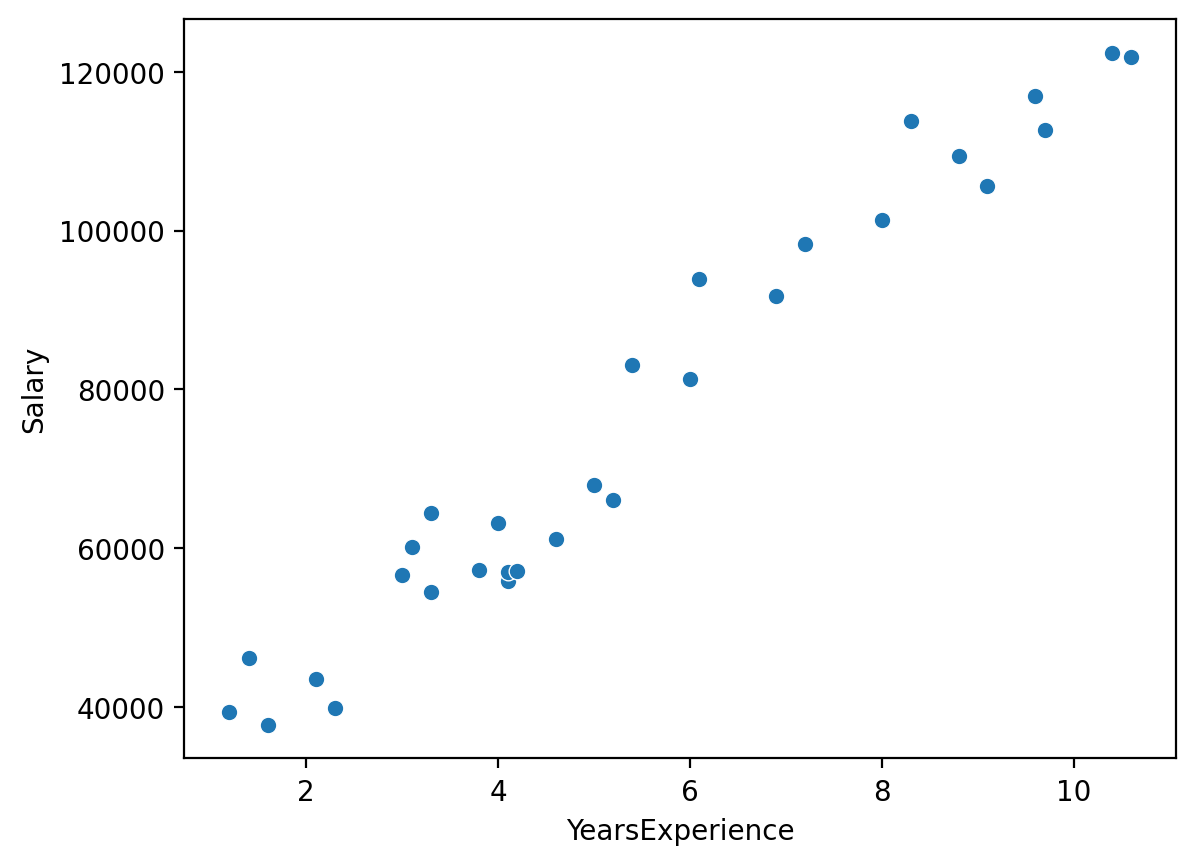

In [7]:
sns.scatterplot(x = 'YearsExperience', y = 'Salary', data = data)
plt.show()

In [8]:
x = np.array(data['YearsExperience'])

In [9]:
X = np.column_stack((np.ones(30), x))

In [10]:
X[:10]

array([[1. , 1.2],
       [1. , 1.4],
       [1. , 1.6],
       [1. , 2.1],
       [1. , 2.3],
       [1. , 3. ],
       [1. , 3.1],
       [1. , 3.3],
       [1. , 3.3],
       [1. , 3.8]])

In [11]:
y = np.array(data['Salary'])

In [12]:
y

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])

Simple linear regression is the process of fitting a straight line to a set of paired observations:
$$
(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)
$$
The general form of the linear model is:
$$
y = a_0 + a_1 x + e
$$
where $a_0$ is the intercept, $a_1$ is the slope, $e$ is the residual error, i.e., the difference between the observed and predicted values

For each data point, the residual is:
$$
e_i = y_i - (a_0 + a_1 x_i)
$$

Our goal is to find the coefficients $a_0$ and $a_1$ that minimize the **sum of squared residuals**:

$$
S_r = \sum_{i=1}^{n} (y_i - a_0 - a_1 x_i)^2
$$

To minimize $S_r$, we take partial derivatives with respect to $a_0$ and $a_1$, and set them to zero:
$$
\frac{\partial S_r}{\partial a_0} = -2 \sum (y_i - a_0 - a_1 x_i) = 0
$$
$$
\frac{\partial S_r}{\partial a_1} = -2 \sum (y_i - a_0 - a_1 x_i) x_i = 0
$$

This leads to a system of two linear equations in $a_0$ and $a_1$:

$$
\begin{cases}
n a_0 + a_1 \sum x_i = \sum y_i \\
a_0 \sum x_i + a_1 \sum x_i^2 = \sum x_i y_i
\end{cases}
$$

We can rewrite this system compactly in matrix form:

$$
\begin{bmatrix}
n & \sum x_i \\
\sum x_i & \sum x_i^2
\end{bmatrix}
\begin{bmatrix}
a_0 \\
a_1
\end{bmatrix}
=
\begin{bmatrix}
\sum y_i \\
\sum x_i y_i
\end{bmatrix}
$$
This is a system of linear equations:
$$
A \cdot \mathbf{a} = \mathbf{b}
$$

where
- $A$ is a $2 \times 2$ coefficient matrix
- $\mathbf{a} = \begin{bmatrix} a_0 \\ a_1 \end{bmatrix}$ is the vector of unknowns
- $\mathbf{b}$ is the right-hand side vector


The solution can be obtained by inverting or solving the linear system and obtain the formulas for coefficients
$$
a_1 = \frac{n \sum x_i y_i - \sum x_i \sum y_i}{n \sum x_i^2 - (\sum x_i)^2}
$$

$$
a_0 = \bar{y} - a_1 \bar{x}
$$

where $\bar{x}$ and $\bar{y}$  is the mean of the feature values and the mean of the target values respectively.

In [13]:
def linear_regression(x, y):
    n = len(x)
    sumx = np.sum(x)
    sumy = np.sum(y)
    sumxy = np.sum(x * y)
    sumx2 = np.sum(x ** 2)

    x_mean = sumx / n
    y_mean = sumy / n

    a1 = (n * sumxy - sumx * sumy ) / (n * sumx2 - sumx * sumx)
    a0 = y_mean - a1 * x_mean

    return {
        'Intercept': a0,
        'Slope': a1
    }

In [14]:
result = linear_regression(x, y)
a0 = result['Intercept']
a1 = result['Slope']
print(a0, a1)

24848.20396652312 9449.96232145509


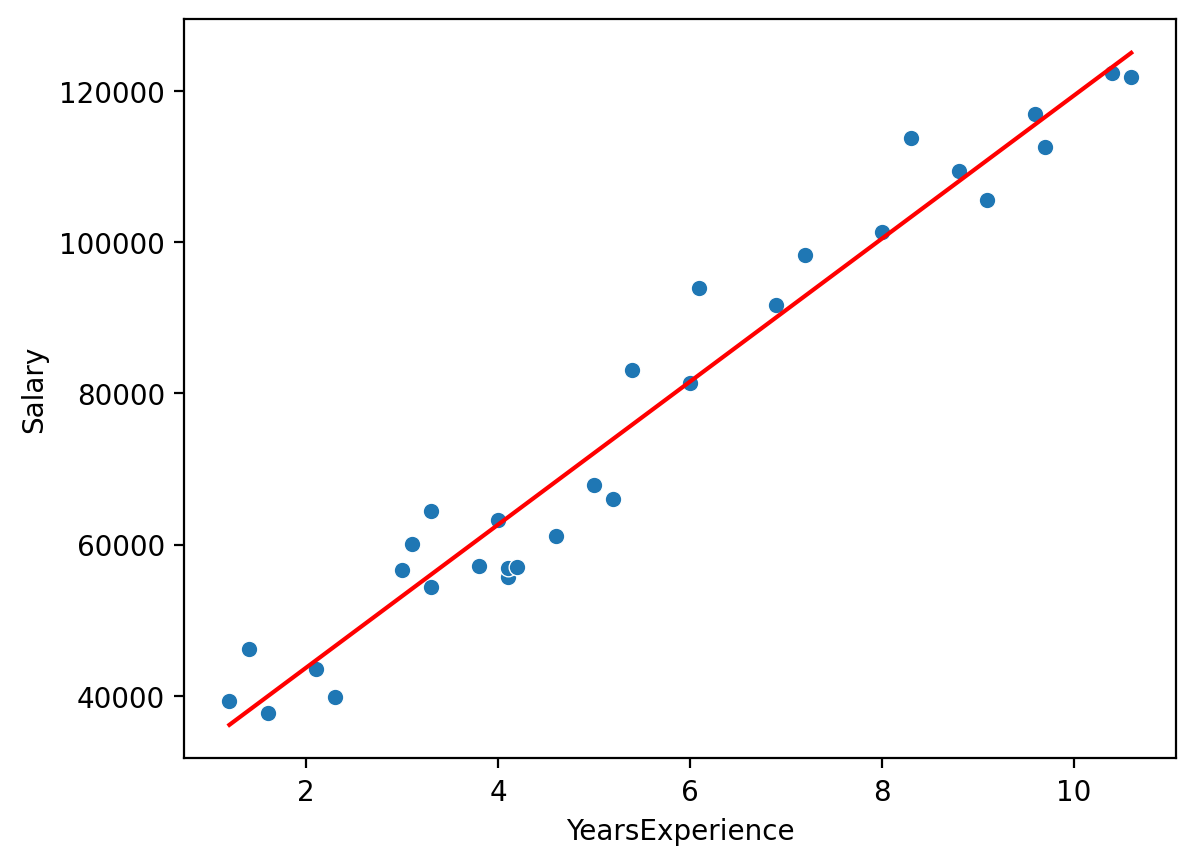

In [15]:
sns.scatterplot(x = 'YearsExperience', y = 'Salary', data = data)
x_line = np.linspace(data['YearsExperience'].min(), data['YearsExperience'].max(), 100)
y_line = a0 + a1 * x_line
plt.plot(x_line, y_line, color='red')
plt.show()

Once we have computed the coefficients $a_0$, $a_1$ that is intercept and slope, we can use the linear model to make predictions for new input values.

In [16]:
y_pred = a0 + a1 * x

In [17]:
y_pred

array([ 36188.15875227,  38078.15121656,  39968.14368085,  44693.12484158,
        46583.11730587,  53198.09093089,  54143.08716303,  56033.07962732,
        56033.07962732,  60758.06078805,  62648.05325234,  63593.04948449,
        63593.04948449,  64538.04571663,  68318.03064522,  72098.0155738 ,
        73988.00803809,  75878.00050238,  81547.97789525,  82492.9741274 ,
        90052.94398456,  92887.932681  , 100447.90253816, 103282.8912346 ,
       108007.87239533, 110842.86109176, 115567.84225249, 116512.83848464,
       123127.81210966, 125017.80457395])

In [18]:
errors = y_pred - y

In [19]:
errors

array([ -3155.84124773,  -8127.84878344,   2236.14368085,   1167.12484158,
         6691.11730587,  -3444.90906911,  -6007.91283697,   1587.07962732,
        -8412.92037268,   3568.06078805,   -570.94674766,   7798.04948449,
         6635.04948449,   7456.04571663,   7206.03064522,   4159.0155738 ,
         7958.00803809,  -7210.99949762,    183.97789525, -11448.0258726 ,
        -1686.05601544,  -5386.067319  ,   -855.09746184, -10530.1087654 ,
        -1424.12760467,   5259.86109176,  -1402.15774751,   3876.83848464,
          735.81210966,   3144.80457395])

**MAPE** stands for **Mean Absolute Percentage Error**, and it's a commonly used metric to evaluate the accuracy of regression models and gives an error
in percentage terms, which makes it easy to interpret. MAPE measures the average absolute percentage difference between the predicted values and the actual values.
Lower MAPE is better, a perfect model would have MAPE = 0%
$$
\text{MAPE} = \frac{100\%}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|
$$

In [20]:
MAPE = np.mean(np.abs((y - y_pred) / y)) * 100
print(f"MAPE: {MAPE:.5f}%")

MAPE: 7.04792%


**Mean Squared Error (MSE)** measures the average of the squared differences between actual and predicted values:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
**Root Mean Squared Error (RMSE)** is the square root of MSE, and it is often preferred because it has the same units as the target variable. For both metrics
lower values indicate better performance.
$$
\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }
$$

In [21]:
RMSE = np.sqrt(mean_squared_error(y, y_pred))

In [22]:
RMSE

np.float64(5592.04360876066)

The next part of this project involves splitting the dataset into training and testing sets. This allows us to evaluate how well the model generalizes
to unseen data. After splitting, I will apply scikit-learn’s built-in Linear Regression model to verify and compare the results with our manually calculated coefficients. This also gives us a chance to evaluate performance using metrics like MSE, RMSE, and MAPE on the test set.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


As we see the coeficents ia a little bit differ from the previous ones because we have used not the whole data, only a test data. However, if we use the whole
dataset we will obtain the same manually calculated coefficients, which confirms my results.

In [26]:
model.coef_, model.intercept_

(array([   0.       , 9371.0160797]), np.float64(24542.025828030768))

In [27]:
model_2 = LinearRegression()

In [28]:
model_2.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
model_2.coef_, model_2.intercept_

(array([   0.        , 9449.96232146]), np.float64(24848.20396652317))

In [30]:
y_pred_sk = model_2.predict(X_test)

Same metrics can be calculated for the test part of the data

In [31]:
mse = mean_squared_error(y_test, y_pred_sk)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_sk)
mape = mean_absolute_percentage_error(y_test, y_pred_sk) * 100  # в процентах

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 4989.74
RMSE: 5929.66
MAPE: 6.09%


The reggression line can also be visualized for the the test data point, depicting the best fit line

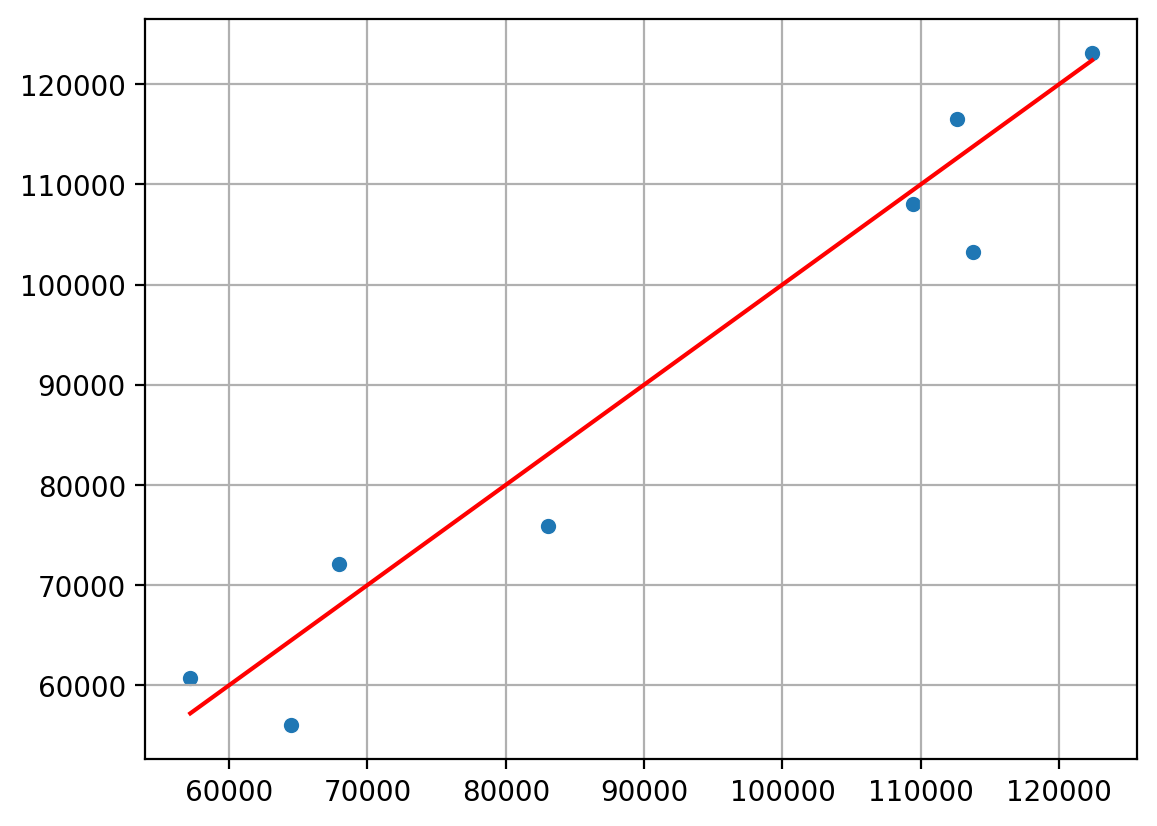

In [32]:
sns.scatterplot(x = y_test, y = y_pred_sk)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.grid(1)

# References
[1] Numerical Methods for Engineers, Seventh Edition
    Steven C. Chapra, Raymond P. Canale

[2] https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression/code
